### Importing all the library 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering

### Reading the Datasets

In [4]:
data =pd.read_csv('Datasets/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
new_data = data.drop('variety',axis = 1)

### Ploting a Dendrogram 

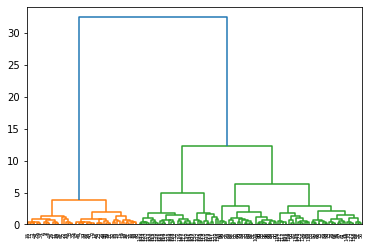

In [7]:
linkage_data = linkage(new_data,method='ward')
dendro = dendrogram(linkage_data)

### Cutting the Dendrogram for best no.of Cluster

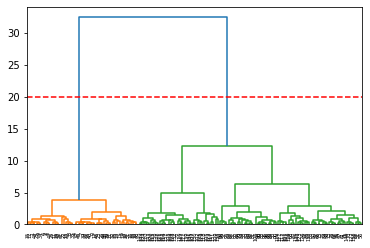

In [9]:
dendro = dendrogram(linkage_data)
plt.axhline(y=20,color='red',linestyle='--')

### Creating a Model with no.of cluster = 2

In [11]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
clusters = hierarchical_cluster.fit_predict(new_data)

In [12]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
clustered_result = pd.DataFrame({
    'variety':data['variety'],
    'Cluster':clusters})

### Counting the No.of Data Points in hierarchical cluster 

In [14]:
clustered_result['Cluster'].value_counts()

0    100
1     50
Name: Cluster, dtype: int64

### Counting the No.of Data Points as Class

In [20]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

### Finding the Error

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(new_data,hierarchical_cluster.labels_)

0.6867350732769781

### Creating Cluster with No.of Cluater = 3

In [22]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
clusters = hierarchical_cluster.fit_predict(new_data)

In [23]:
clustered_result = pd.DataFrame({
    'variety':data['variety'],
    'Cluster':clusters})

In [25]:
clustered_result['Cluster'].value_counts()

0    64
1    50
2    36
Name: Cluster, dtype: int64

In [26]:
new_data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
hierarchical_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)